# Servo Prediction
In modern industries, servos play a crucial role in ensuring the precise control and movement of various mechanical systems. However, the reliability of servos can be affected by various factors, leading to potential failures. To mitigate the impact of unexpected servo failures and minimize downtime, there is a need for a predictive maintenance system. The aim of this project is to design and implement a machine learning model, specifically logistic regression, to predict servo failures based on historical data and key operational parameters

What is Servo : In control engineering a servomechanism, usually shortened to servo, is an automatic device that uses error-sensing negative
feedback to correct the action of a mechanism. On displacement-controlled applications, it usually includes a built-in encoder or other position
feedback mechanism to ensure the output is achieving the desired effect. The term correctly applies only to systems where the feedback or
error-correction signals help control mechanical position, speed, attitude or any other measurable variables. For example, an automotive power
window control is not a servomechanism, as there is no automatic feedback that controls position-the operator does this by observation. By
contrast a car's cruise control uses closed-loop feedback, which classifies it as a servomechanism.

# Data source
A data frame with 167 observations on 5 variables, 4 nominal and 1 as the target class. This data set is from a simulation of a servo system
involving a servo amplifier, a motor, a lead screw/nut, and a sliding carriage of some sort. It may have been on of the translational axes of a
robot on the 9th floor of the Al lab. In any case, the output value is almost certainly a rise time, or the time required for the system to respond to
a step change in a position set point. The variables that describe the data set and their values are the following:
1. Motor A,B,C,D,E
2. Screw A,B,C,D,E
3. Pgain 3,4,5,6
4. Vgain 1,2,3,4,5
5. Class 0.13 to 7.10

# import library

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import data

In [2]:

servo = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Servo%20Mechanism.csv')

## Describe Data

In [3]:
servo.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


In [4]:
servo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


In [5]:
servo.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


## Data Preprocessing

In [6]:
servo.shape

(167, 5)

In [7]:
servo.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [8]:
servo.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
162    False
163    False
164    False
165    False
166    False
Length: 167, dtype: bool

In [9]:
servo[servo.duplicated(keep='first')]

,Motor,Screw,Pgain,Vgain,Class


In [10]:
servo.isnull().sum()

Motor    0
Screw    0
Pgain    0
Vgain    0
Class    0
dtype: int64

## Data Visualization

<Axes: >

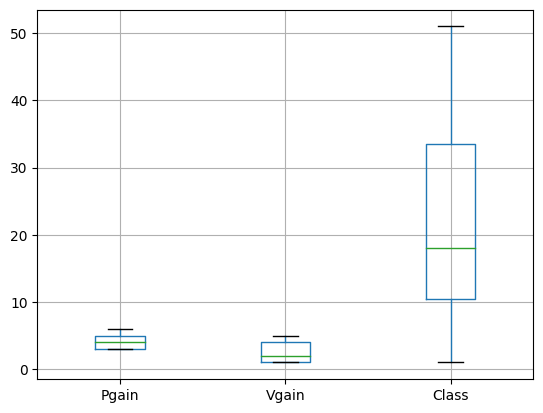

In [11]:
servo.boxplot()

## Define Target Variable (y) and Feature Variables (X)

In [12]:
servo[['Motor' ]]. value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
dtype: int64

In [13]:
servo[['Screw' ]]. value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
dtype: int64

In [14]:
servo.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)


In [15]:
servo.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

In [16]:
y=servo['Class']

In [17]:
y.shape

(167,)

In [18]:
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [19]:
X=servo[['Motor', 'Screw', 'Pgain', 'Vgain']]

In [20]:
X.shape

(167, 4)

In [21]:
X

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


## Train Test Split

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=2529)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((116, 4), (51, 4), (116,), (51,))

## Modeling

In [43]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [44]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [45]:
y_pred = model.predict(X_test)

In [46]:
y_pred

array([23, 35, 19, 22, 36, 13, 11, 11, 43, 45,  9, 21,  8,  3,  4, 13,  5,
       40, 45, 12, 43, 35, 36, 43, 18,  8,  4,  7, 13,  6, 28, 25, 45, 44,
        3,  9, 21, 43,  3, 43, 35,  7,  3,  3, 34, 23, 44,  9,  6,  7, 26])

# model evaluation

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [48]:
confusion_matrix(y_test,y_pred)

array([[0, 2, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [49]:
accuracy_score(y_test,y_pred)

0.0784313725490196

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         2
           3       0.20      0.50      0.29         2
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          11       0.50      0.20      0.29         5
          12       1.00      0.50      0.67         2
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         0
          23       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

# Visualization of accurate and predicted result

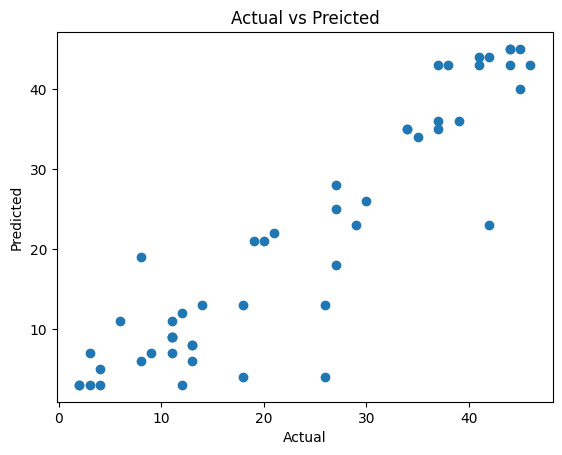

In [51]:

plt.scatter (y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Preicted")
plt.show()

# Get Future Predictions
Lets select a random sample from existing dataset as new value
Steps to follow
1. Extract a random row using sample function
2. Separate X and y
3. Standardize X
4. Predict

In [52]:
X_new = servo.sample(1)

In [53]:
X_new

,Motor,Screw,Pgain,Vgain,Class
36,3,4,3,1,10


In [54]:
X_new.shape

(1, 5)

In [55]:
X_new =X_new.drop('Class',axis =1)

In [56]:
X_new

,Motor,Screw,Pgain,Vgain
36,3,4,3,1


In [57]:
X_new.shape

(1, 4)

In [58]:
y_pred_new = model.predict(X_new)

In [59]:
y_pred_new

array([10])